In [1]:
import numpy as np
import pandas as pd
from obspy import Catalog,read_events
import glob
from obspy import UTCDateTime
import json
import os
import time
import datetime
from datetime import datetime
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
#%%
from obspy import read

st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')

#%%
# --------------- Load catalog data --------------------

ev_file = os.path.join('/home/miau/Descargas/Yel_2021Q4.csv')

# load event data
dq = pd.read_csv(ev_file)
dq['otime'] = dq['year'].astype(str) + '-' + dq['month'].astype(str) + '-' + dq['day'].astype(str) + ' ' + dq['hour'].astype(str) + ':' + dq['min'].astype(str) + ':' + dq['sec'].astype(str)
# parse dates
dq['otime'] = pd.to_datetime(dq['otime'])
dq['dep'] = dq['depth']

# parse dates
dq['otime'] = pd.to_datetime(dq['otime'])
# number of EQs
Neq = dq.shape[0]
print(f"Number of Catalog EQs Loaded:  {Neq}")
#%%

start_date = pd.Timestamp(year=2012, month=1, day=1)
end_date = pd.Timestamp(year=2023, month=12, day=31)
dq = dq[(dq['otime'] >= start_date) & (dq['otime'] <= end_date)]

base_dt = pd.to_datetime(min(dq['otime']))
#base_dt = pd.to_datetime('2010-01-05 05:12:40.030')
##hacemos delta T
dq['new_otime'] = dq['otime']

dq['new_otime']= dq['new_otime'] - base_dt
###Convierto a años
dq['new_otime']= dq['new_otime'].dt.total_seconds() / (365.25*24*3600)
dq= dq[['mag','new_otime', 'lat', 'lon', 'depth', 'rms', 'erh', 'erz', 'otime', 'gap']]
dq = dq.loc[(dq['gap'] == 'gap') | ((dq['gap'] < 180) & (dq['gap'] != 'gap'))]

dq['otime'] = pd.to_datetime(dq['otime'])

Number of Catalog EQs Loaded:  50073


# Guardo los datos

In [2]:
dq.to_csv('2012-2021.txt', sep=" ", index=False, header=True)

In [3]:
dq

,mag,new_otime,lat,lon,depth,rms,erh,erz,otime,gap
32395,1.22,0.001549,44.7625,-111.0853,7.05,0.16,0.5,0.8,2012-01-04 00:30:52.450,106
32396,0.53,0.004823,44.3922,-110.3982,11.83,0.10,0.7,1.4,2012-01-05 05:12:41.220,128
32398,0.27,0.011963,44.5893,-110.3742,2.01,0.09,0.5,9.4,2012-01-07 19:48:27.890,173
32399,0.54,0.023116,44.3920,-110.4518,0.11,0.04,0.4,0.5,2012-01-11 21:34:02.440,178
32400,1.56,0.035331,44.3243,-110.6693,6.63,0.09,0.5,1.1,2012-01-16 08:39:01.260,150
...,...,...,...,...,...,...,...,...,...,...
50068,0.21,9.984133,44.5647,-110.6863,6.88,0.16,0.5,1.0,2021-12-28 03:50:41.720,111
50069,1.60,9.984133,44.5643,-110.6903,5.68,0.19,0.4,2.2,2021-12-28 03:50:46.420,110
50070,1.62,9.984331,44.8152,-110.9338,6.47,0.14,0.4,1.0,2021-12-28 05:35:01.460,125
50071,0.87,9.994200,44.7053,-111.1020,8.49,0.14,0.6,1.1,2021-12-31 20:05:50.240,130


In [4]:
data = pd.read_table('2012-2021.txt', sep='\s+')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from geopy import distance
import pandas as pd
import utm

##Constantes
q=0.5
b=1  
df= float(1.6)
##cargamos los años, lat, lon y mag

#data = '2012-2021.txt'
#data= np.loadtxt(data)

data = pd.read_table('2012-2021.txt', sep='\s+')
#time= data[:, 1]
#lat= data[:, 2]
#lon = data[:, 3]
#mag= data[:, 0]
#dep= data[:,4]


time= data['new_otime']
lat= data['lat']
lon = data['lon']
mag= data['mag']
dep= data['depth']

x= []
y=[]
for i,j in zip(lat,lon):
    coord= utm.from_latlon(i, j)
    x.append(coord[1]/1000)
    y.append(coord[0]/1000)

In [6]:
results= []
listan =[]
T_N= []
X_N= []
N_clust= []
singles=[]
index= []
clust=[]
indclust=[]
listaind =[]
listaj=[]
listanew=[]
laq=[]

for j in range(1,len(time)):
    delta_t= time[j] - time[:j]
    distance = np.sqrt((x[j]-x[:j])**2 + (y[j]-y[:j])**2+ (dep[j]-dep[:j])**2)
    T = delta_t*(np.power(10,-q*mag[:j])) 
    X = np.power(distance, df)*np.power(10,((-1+q)*b*mag[:j]))
    N = np.amin(T*X)
    results.append((N))
    item_index = np.where(T*X==N)
    #T_N.append(T[item_index])
    #X_N.append(X[item_index])
    hola = item_index[0]
    hola1 = hola[0]
    index.append(hola1)
    T_N.append(T[hola1])
    X_N.append(X[hola1])
    #print(j,hola)
    if N>10**(-4.8):
        #10e-5:
        singles.append(j)
        clust.append(j)
        indclust.append('')
    
    if N<10**(-4.8):
        clust.append(j)
        indclust.append(item_index)    
    
Nv = np.asarray(results)
T_N= np.asarray(T_N, dtype='object')
X_N= np.asarray(X_N, dtype='object')
#T_N =np.concatenate(T_N)
#X_N =np.concatenate(X_N)
#T_N = np.reshape(T_N,-1).astype(float)
#X_N = np.reshape(X_N,-1).astype(float)
Nv = np.asarray(results)

In [31]:
dm605= diccionario[605]['Parientes']
indices_605 = [i for i, x in enumerate(diccionario[605]['Parientes']) if x]
dm576= diccionario[576]['Parientes']
indices_576 = [i for i, x in enumerate(diccionario[576]['Parientes']) if x]

In [32]:
numeros_de_fila605 = dm605.index.tolist()
numeros_de_fila576 = dm576.index.tolist()

In [33]:
for i in numeros_de_fila576:
    print(results[i])
    

6.6487300742950346e-09
1.286693470838629e-09
4.065823345472247e-07
2.293003329677765e-08
1.6275773550547877e-07
9.761692102922082e-08
1.1260237012279864e-07
1.3580958790866175e-06
3.8978366049893404e-07
1.0662819615323839e-06
2.3775681373385932e-08
2.5424723290572047e-08
9.19991984768096e-08
2.546974575516825e-07
2.1992326156216094e-06
7.495001302725175e-07
1.6476197938981788e-07
1.0111889851873377e-07
5.571209793869361e-08
7.540890464354573e-08
9.925000257569288e-07
1.1414485469761298e-07
7.58515285727364e-09
3.8246744392149323e-07
6.309852643143741e-08
9.458245830330054e-09
4.02942866974052e-09
9.807317516305354e-09
3.834826263973705e-09
1.7992876183896863e-08
8.404078290873659e-08
4.4651237127058877e-07
3.657325609551185e-08
1.0917541208718384e-08
7.361460740935124e-08
1.237112851636768e-07
9.103789005295392e-07
1.3548041327000066e-05
3.710533022930789e-07
5.649537692073373e-07
1.3299846856567138e-07
7.53259107962611e-07
2.2475779852849e-07
2.909579566550841e-07
2.5029157289299945e-

In [34]:
for i in numeros_de_fila605:
    print(results[i])

7.558102907364617e-07
3.691173902870555e-08
5.259456440334381e-08
1.3683168413668346e-05
8.484066647391121e-06
2.7640552381600007e-06
9.373975509645008e-07
1.1887412913996262e-08
3.1924316056763045e-05
8.692067746873013e-08
1.153454379032538e-06
1.0527764214527891e-06
5.90566946294672e-06
9.216903010590661e-06
8.416728436753775e-07
4.449909238608439e-06
3.855364131813733e-06
1.4483672859606382e-07
5.583004115706546e-09
7.705160968129138e-07
1.892819894848264e-07
3.1686686250424984e-06
1.273793114024535e-06
5.893275868187671e-06
2.407119857512553e-07
1.6052423797860586e-06
1.5691244412912222e-06
8.932124134035092e-07
9.601510038284382e-07
5.976030107902669e-09
3.3710719618768e-08
1.1023490978794287e-08
1.1196920055695896e-06
2.2675984168015163e-07
3.738927905236833e-08
2.951492277009307e-07
1.5307351752565362e-07
2.0863519726534803e-06
2.657204475093502e-07
2.927716521285723e-07
1.3763674929306206e-07
4.335268930975545e-08
1.3775784490398655e-05
5.101901397412957e-07
5.853868203755195e-

In [7]:
##### from collections import Counter
import matplotlib.pyplot as plt

lista0 =[]
lista1= []
lista2=[]
enjambre1=[]
parent=[]
index_parent= []

for i in range(1, len(time)):
    lista= []
    indexlist= index[i-1]
    if i in singles:
        lista.append(0) 
    lista.append(indexlist)
    lista0.append(lista)
    newlista = lista0[indexlist-1]
    lista.extend(newlista)
    index0 = lista.index(0)
    #lista de cada rama
    lista = lista[:index0]
    #lista que contiene todas las listas correspondientes a cada rama
    lista1.append(lista)
    #lista que contiene la longitud de cada rama
    lista2.append(len(lista))
    #guardo padre de cada sismo 
    parent.append(lista[-1:])    
    #print(lista[-1:])
    #print(i, lista)

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

last_element=[]
for j in parent:
    ##si son diferentes, es decir que tiene por lo menos 1 NN
    if j!= []:
        
        last_element.append(j[0])
    ##singles    
    else:
        last_element.append(0)
        
#me da la familia de cada padre    
counts = dict(Counter(last_element))

##Obteniendo la cantidad de familiares de cada padre 
items = counts.items()
items1= []
for i in items:
    items1.append(i)

resultado = [tup[1] for tup in items1]

In [9]:
from collections import defaultdict

def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i+1)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>=1)
ind_clust_size= []

for dup in sorted(list_duplicates(last_element)):
    ind_clust_size.append(dup)
    
padres = [tup[0] for tup in ind_clust_size]
family =[tup[1] for tup in ind_clust_size]


for elem in padres:
    if elem in singles:
        singles.remove(elem)

In [10]:
padres1 = padres[1:]
list1 = []
all_rama = []
inicial= []
lista_hijos =[]
nueva_lista=[]
not_leaf= []

for i in range(0, len(padres1)+1):
    hijos = family[i]
    all_rama= []
    for j in hijos:
        list1= lista1[j-1]
        all_rama.extend(list1)     
    not_leaf.append(set(all_rama))
    nueva_lista.append(all_rama)
     
nue = [list(i) for i in not_leaf]
counter= []
garb= []
rama =[]
ramas_clust =[]

for i in range(0, len(nueva_lista)):
    rama= []
    hijos1 = family[i]
    nuef= nue[i]
    for count,j in enumerate(hijos1):
        if j in nuef:
            #print(i, 'no', j)
            garb.append(j)
        else:
            rama.append(j)
    counter.append(count)
    ramas_clust.append(rama)

In [11]:
longitudes = [[len(lista1[i-1])+1 for i in lista] for lista in ramas_clust]
mean_ld=[]
for i in longitudes:
    mean_ld.append(np.mean(i))

In [12]:
#enjambre más grande en el intervalo de tiempo seleccionado
cantidad= []
for i in family[1:]:
    #clustt = i[1]
    cantidad.append(len(i))

maximo= max(cantidad)
indice_max= cantidad.index(maximo) 
print('cluster más grande:',indice_max,'con un total de',cantidad[indice_max],'todos los tamaños de los cluster:', cantidad)

cluster más grande: 576 con un total de 1237 todos los tamaños de los cluster: [1, 1, 1, 4, 1, 7, 2, 3, 1, 1, 1, 1, 3, 1, 6, 2, 2, 1, 2, 1, 3, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 7, 7, 2, 9, 2, 2, 3, 1, 2, 4, 1, 3, 1, 2, 1, 1, 2, 4, 2, 1, 2, 50, 5, 2, 6, 7, 1, 1, 1, 1, 1, 10, 1, 1, 3, 5, 4, 6, 4, 1, 2, 9, 11, 1, 1, 1, 1, 1, 36, 13, 1, 1, 1, 1, 1, 4, 3, 1, 5, 1, 2, 2, 19, 1, 1, 1, 10, 2, 10, 1, 1, 7, 1, 7, 7, 1, 2, 6, 18, 3, 3, 13, 3, 5, 1, 46, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 4, 11, 3, 1, 1, 22, 1, 2, 1, 1, 19, 48, 1, 1, 1, 2, 25, 1, 3, 1, 1, 2, 1, 1, 1, 3, 4, 1, 17, 1, 2, 2, 1, 22, 4, 2, 4, 113, 24, 4, 1, 2, 1, 88, 2, 19, 1, 4, 3, 15, 3, 5, 1, 1, 3, 45, 1, 1, 3, 13, 1, 1, 6, 1, 1, 9, 3, 1, 2, 1, 1, 5, 1, 3, 1, 1, 1, 4, 1, 4, 2, 168, 2, 1, 1, 2, 3, 10, 2, 2, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 9, 1, 2, 2, 39, 1, 1, 3, 1, 1, 10, 1, 1, 1, 2, 1, 1, 2, 1, 63, 1, 1, 1, 1, 9, 3, 6, 4, 33, 3, 6, 1, 2, 1, 25, 4, 2, 2, 3, 6, 2, 1, 1, 1, 2, 3, 2, 3, 3, 15, 129, 1, 3, 1, 10, 1, 10, 10, 2, 1, 1, 1, 

In [13]:
indices = [i for i, x in enumerate(cantidad) if x > 400]
valores = [x for x in cantidad if x > 400]
print(indices, valores)

[576, 605, 693, 1163] [1237, 477, 701, 794]


In [14]:
diccionario = {}
for i in indices:
    enjambre= family[i+1]
    data_enjambre= data.iloc[enjambre]
    time_enjambre = data_enjambre['otime']
    lat_enjambre= data_enjambre['lat']
    lon_enjambre= data_enjambre['lon']
    mag_enjambre= data_enjambre['mag']
    padre_enjambre = padres[i+1]
    ultimo_sismo= enjambre[-1:]
    mlf=mean_ld[i+1]
    diccionario[i] = {"padre": padre_enjambre, "ultimo sismo": ultimo_sismo, "mean leaf": mlf, "Parientes": data_enjambre, 'Latitudes': lat_enjambre, 'Longitudes': lon_enjambre}
    print(i, diccionario[i])

576 {'padre': 5789, 'ultimo sismo': [8155], 'mean leaf': 8.05641592920354, 'Parientes':        mag  new_otime      lat       lon  depth   rms  erh  erz  \
5790  3.13   5.440776  44.7848 -111.0240  11.09  0.07  0.5  1.3   
5791  2.71   5.440779  44.7802 -111.0257   9.00  0.16  0.5  0.8   
5792  2.10   5.440782  44.7818 -111.0228   8.76  0.16  0.6  0.9   
5793  0.19   5.440789  44.7848 -110.9788   1.42  0.23  1.1  0.3   
5794  0.81   5.440790  44.7767 -111.0177   8.27  0.10  0.4  0.7   
...    ...        ...      ...       ...    ...   ...  ...  ...   
8107  0.73   5.654487  44.7863 -111.0263   7.98  0.18  0.6  0.7   
8110  0.49   5.658189  44.7777 -111.0365   8.87  0.08  0.4  0.6   
8111  0.70   5.658381  44.7780 -111.0362   9.21  0.08  0.4  0.6   
8131 -0.02   5.669822  44.7845 -111.0308   8.38  0.15  0.5  0.8   
8155  0.73   5.683101  44.7868 -111.0208   8.79  0.16  0.5  0.8   

                        otime  gap  
5790  2017-06-12 16:46:47.050  167  
5791  2017-06-12 16:48:09.860  16

In [15]:
#Datos singles
data_singles= data.iloc[singles]
lat_singles = data_singles['lat']
lon_singles = data_singles['lon']

[576, 605, 693, 1163]


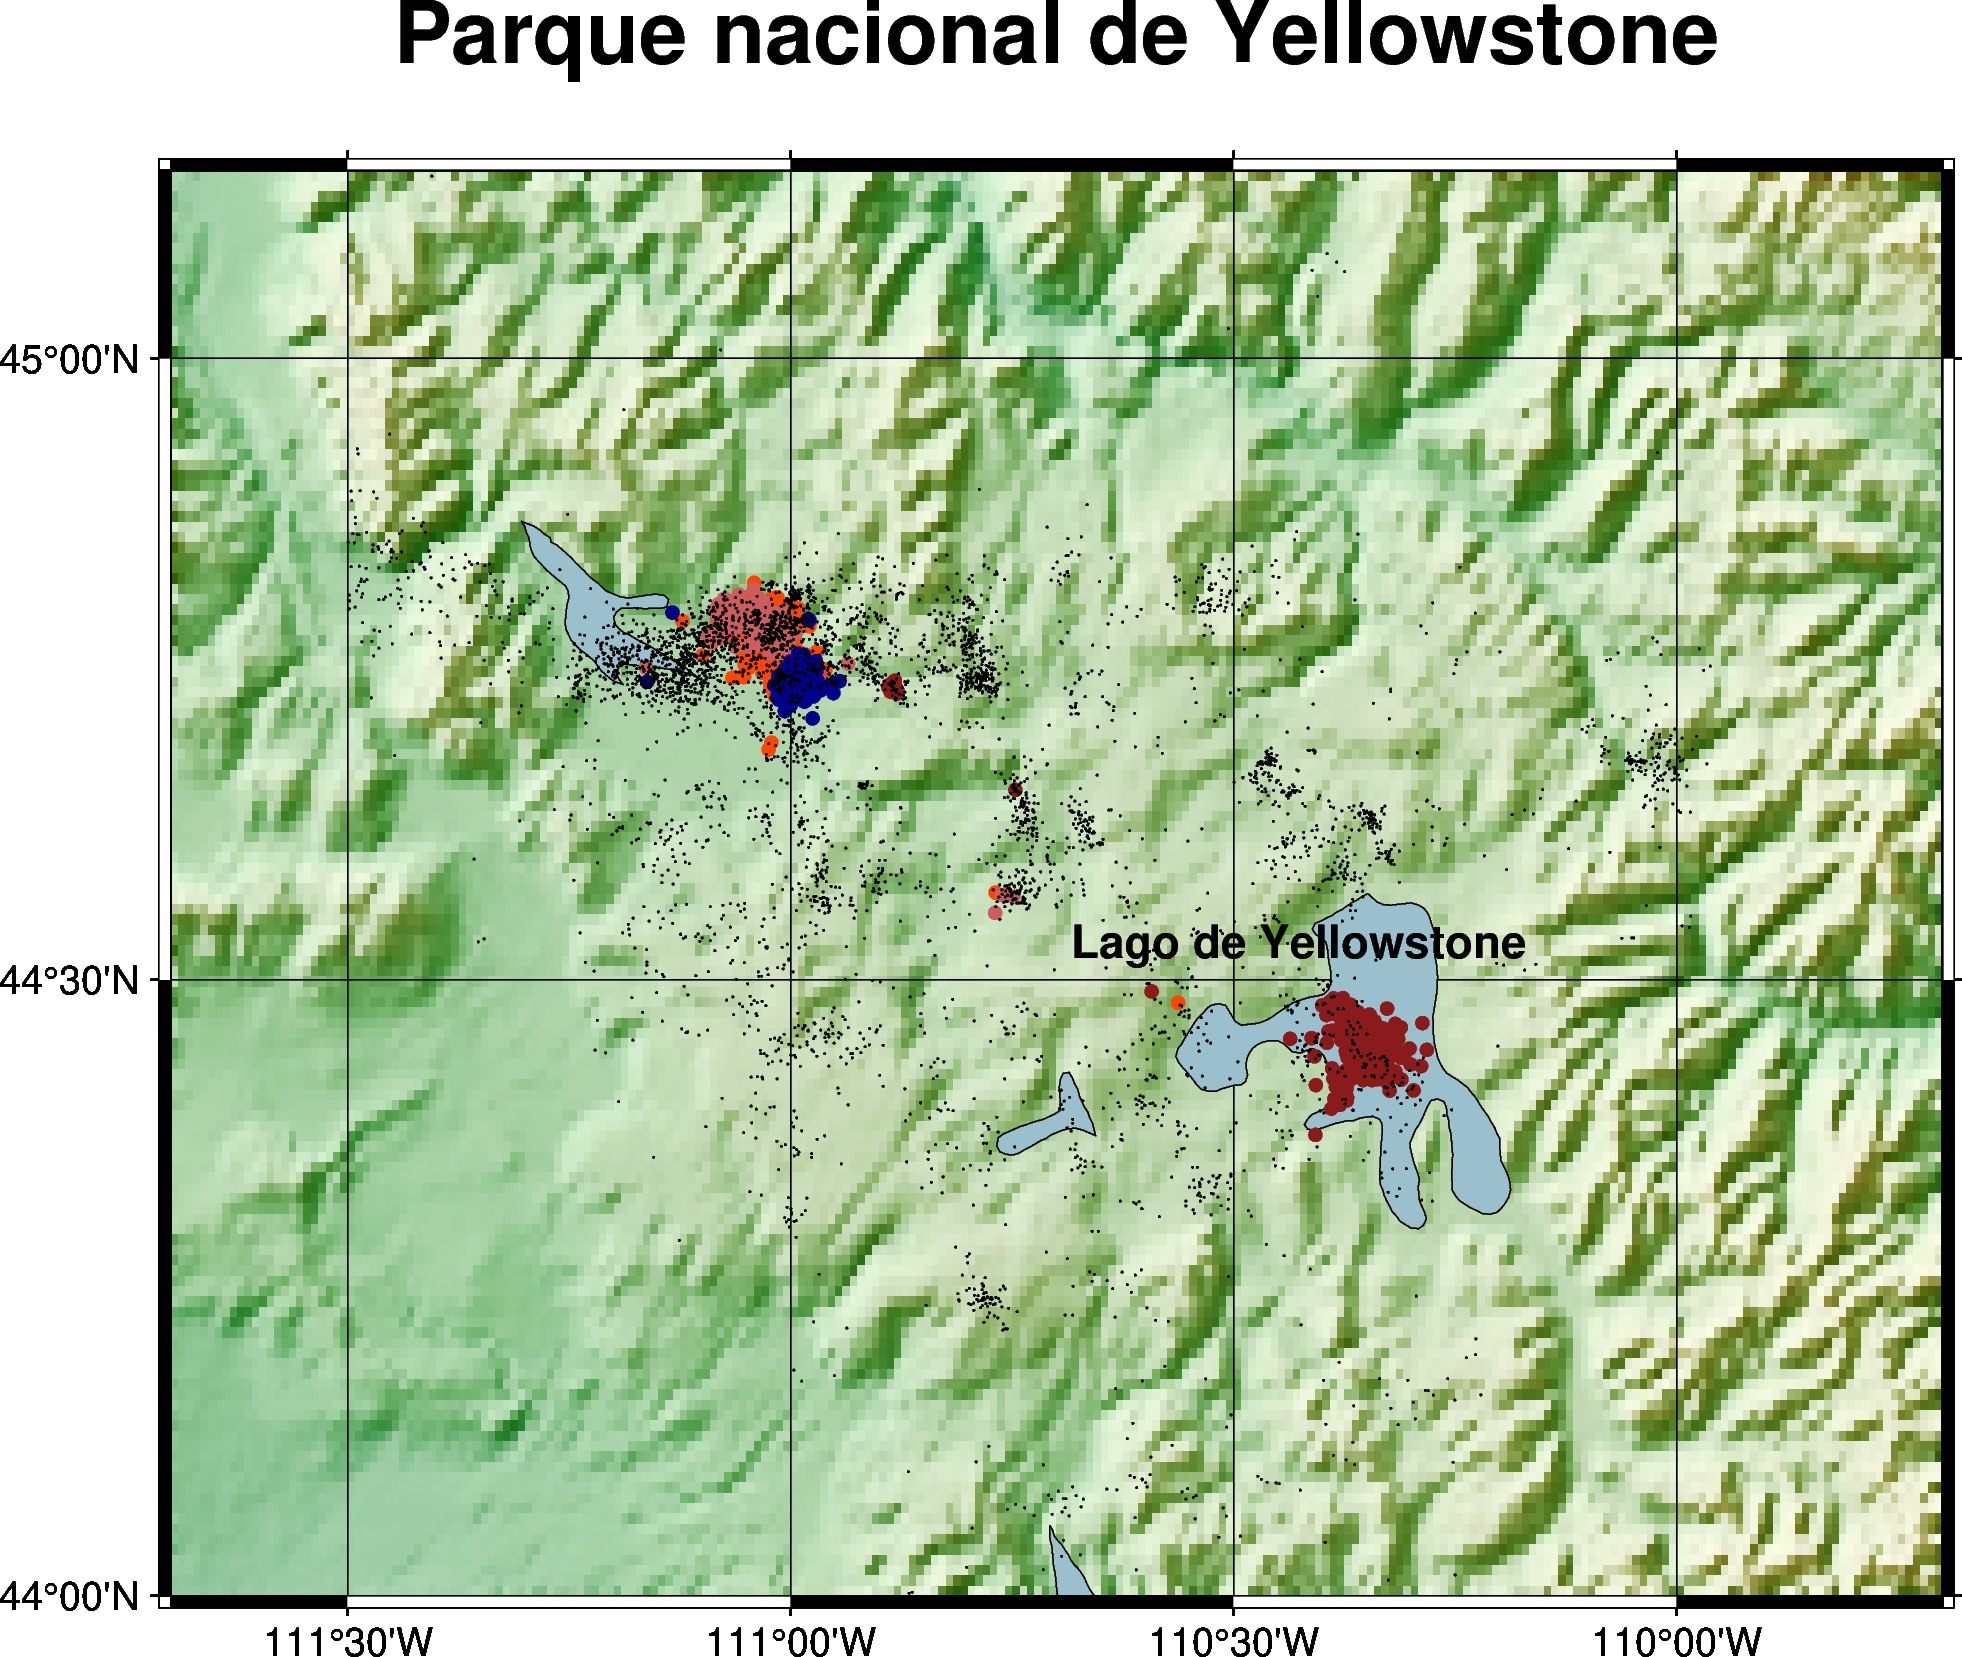

In [16]:
import pygmt 
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime


#indices = [271, 636, 704, 1212]


latmin, latmax, lonmin, lonmax= 44.00, 45.15,-111.70, -109.70

region= region = [
    lonmin ,
    lonmax ,
    latmin ,
    latmax,
]

print(indices)
topo_data = "@earth_relief_30s"

fig = pygmt.Figure()

pygmt.makecpt(
    cmap='topo',
    series= '0/4800/4800',
    continuous=True
)

fig.grdimage(
    region=region,
    grid= topo_data,
    projection="M15c",
   shading= True,
    transparency= 80,
    frame="ag",
)



fig.coast(
    region=region, 
    projection='M15c', 
    shorelines=True,
    water= "LightBlue3",
    frame=True,
    #land= 'darkseagreen',
    borders="1/0.5p",
)

colores = ['orangered', 'indianred', 'blue4', 'firebrick4']
for i, indice in enumerate(indices):
    fig.plot(
        x=diccionario[indice]['Longitudes'],
        y=diccionario[indice]['Latitudes'],
        style="c0.12c",
        color=colores[i],
        transparency=100,
    )

fig.plot(
        x=lon_singles,
        y=lat_singles,
        style="c0.023",
        color='black',
        transparency=10,
    )


fig.text(
    x=-110.4,
    y=44.55,
    text="Lago de Yellowstone",
    font="11p,Helvetica-Bold,black",
    justify="CM",
    offset="-0.2c/-0.2c",
)


fig.basemap(frame=["a", "+tParque nacional de Yellowstone"])
fig.show()

In [17]:
datos_diccionario = {}


for i in indices:
    ind_primer_sismo = diccionario[i]['padre']
    ind_ultimo_sismo = diccionario[i]['ultimo sismo']
    primer_sismo= data.iloc[ind_primer_sismo]
    ultimo_sismo= data.iloc[ind_ultimo_sismo[0]]
    t_ps=primer_sismo[1]
    t_us=ultimo_sismo[1]
    duracion_enjambre= t_us-t_ps
    mean_leaf= mean_ld[i]
    cantidad_de_sismos= len(diccionario[i]['Parientes'])

    datos_diccionario[i] = {
        'ind_primer_sismo': ind_primer_sismo,
        'ind_ultimo_sismo': ind_ultimo_sismo,
        'primer_sismo': primer_sismo,
        'ultimo_sismo': ultimo_sismo,
        't_ps': t_ps,
        't_us': t_us,
        'duracion_enjambre': duracion_enjambre,
        'mean_leaf': mean_leaf,
        'cantidad_de_sismos': cantidad_de_sismos
        }

In [18]:
indices

[576, 605, 693, 1163]

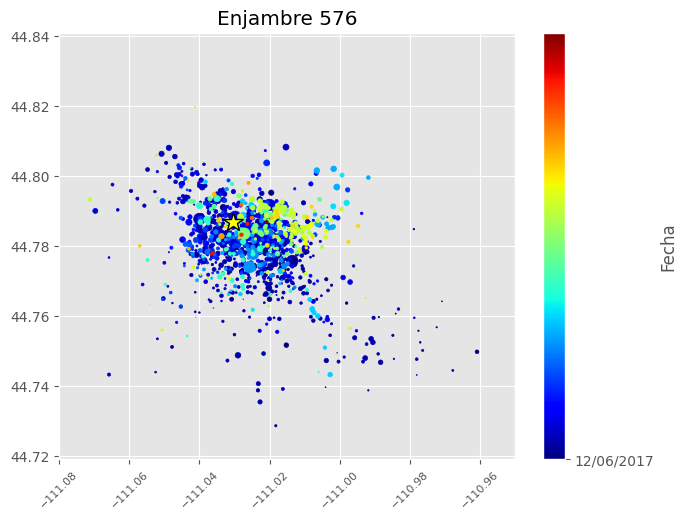

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# escala de color
cmap = plt.cm.get_cmap('jet')

# Estilo
plt.style.use('ggplot')

size = 30
i= 576

enjambre = family[i+1]
data_enjambre = data.iloc[enjambre]
time_enjambre = pd.to_datetime(data_enjambre['otime'])
lat_enjambre = data_enjambre['lat']
lon_enjambre = data_enjambre['lon']
mag_enjambre = data_enjambre['mag']
ps= datos_diccionario[i]['primer_sismo']
lat_ps=ps[2]
lon_ps=ps[3]
#plt.plot(lon_ps, lat_ps, marker='*', color='yellow')
plt.plot(lon_ps, lat_ps, marker='*', color='yellow', markersize=15, markeredgecolor='black')

# Convertir las fechas a números de días desde el primer día de los datos

#ref_date=datos_diccionario[652]['primer_sismo']['otime']
#days_since_ref = (time_enjambre - ref_date).apply(lambda x: x.days)
ref_date = pd.to_datetime(datos_diccionario[i]['primer_sismo']['otime'])
days_since_ref = (time_enjambre - ref_date).apply(lambda x: x.days)
colors = days_since_ref

# tamaño de los puntos segn la magnitud
sizes = size * mag_enjambre / np.max(mag_enjambre)
sizes = np.abs(sizes)
# Para que size no sea cero
if sizes.size == 0:
    sizes = np.array([size])

plt.scatter(lon_enjambre, lat_enjambre, s=sizes, c=colors, cmap=cmap)
#  densidad de datos
plt.axis('equal')
plt.tight_layout()




plt.xlim(-111.08, -110.95)
plt.ylim(44.76, 44.80)
plt.xticks(fontsize=8, rotation=45)

#numeros de días a fechas para mostrar en la barra de color
#seleccionar los valores de los ticks de la barra de color
ticks = np.arange(0, np.max(days_since_ref)+1, 120)
#convertir los numeros de días a fechas
tick_labels = [ref_date + pd.Timedelta(days=d) for d in ticks] 
cbar = plt.colorbar(ticks=ticks, format="%d/%m/%Y")
#mostrar las fechas en la barra de color
cbar.ax.set_yticklabels([d.strftime('%d/%m/%Y') for d in tick_labels]) 
cbar.set_label('Fecha')

plt.title(f'Enjambre {i}')
plt.show()


In [29]:
datos_diccionario[576]

{'ind_primer_sismo': 5789,
 'ind_ultimo_sismo': [8155],
 'primer_sismo': mag                             2.86
 new_otime                   5.440776
 lat                          44.7867
 lon                        -111.0303
 depth                          10.83
 rms                             0.16
 erh                              0.4
 erz                              0.4
 otime        2017-06-12 16:46:37.130
 gap                               47
 Name: 5789, dtype: object,
 'ultimo_sismo': mag                             0.73
 new_otime                   5.683101
 lat                          44.7868
 lon                        -111.0208
 depth                           8.79
 rms                             0.16
 erh                              0.5
 erz                              0.8
 otime        2017-09-09 04:59:54.500
 gap                              149
 Name: 8155, dtype: object,
 't_ps': 5.440775739916851,
 't_us': 5.683100801708622,
 'duracion_enjambre': 0.2423250617917709

In [30]:
diccionario[576]['Parientes']

,mag,new_otime,lat,lon,depth,rms,erh,erz,otime,gap
5790,3.13,5.440776,44.7848,-111.0240,11.09,0.07,0.5,1.3,2017-06-12 16:46:47.050,167
5791,2.71,5.440779,44.7802,-111.0257,9.00,0.16,0.5,0.8,2017-06-12 16:48:09.860,160
5792,2.10,5.440782,44.7818,-111.0228,8.76,0.16,0.6,0.9,2017-06-12 16:49:49.210,162
5793,0.19,5.440789,44.7848,-110.9788,1.42,0.23,1.1,0.3,2017-06-12 16:53:41.090,169
5794,0.81,5.440790,44.7767,-111.0177,8.27,0.10,0.4,0.7,2017-06-12 16:53:57.610,156
...,...,...,...,...,...,...,...,...,...,...
8107,0.73,5.654487,44.7863,-111.0263,7.98,0.18,0.6,0.7,2017-08-29 18:10:02.090,148
8110,0.49,5.658189,44.7777,-111.0365,8.87,0.08,0.4,0.6,2017-08-31 02:37:16.220,139
8111,0.70,5.658381,44.7780,-111.0362,9.21,0.08,0.4,0.6,2017-08-31 04:18:30.360,140
8131,-0.02,5.669822,44.7845,-111.0308,8.38,0.15,0.5,0.8,2017-09-04 08:35:42.900,146


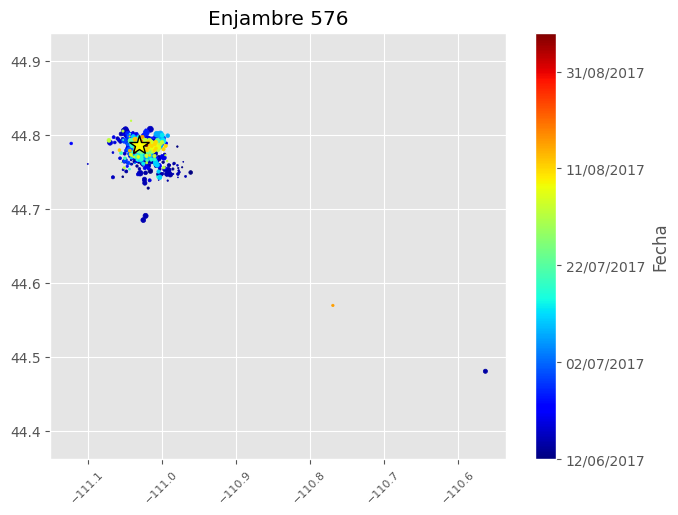

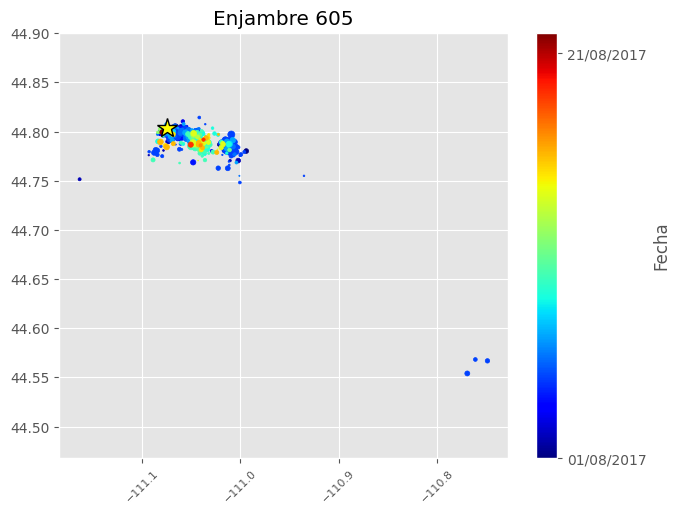

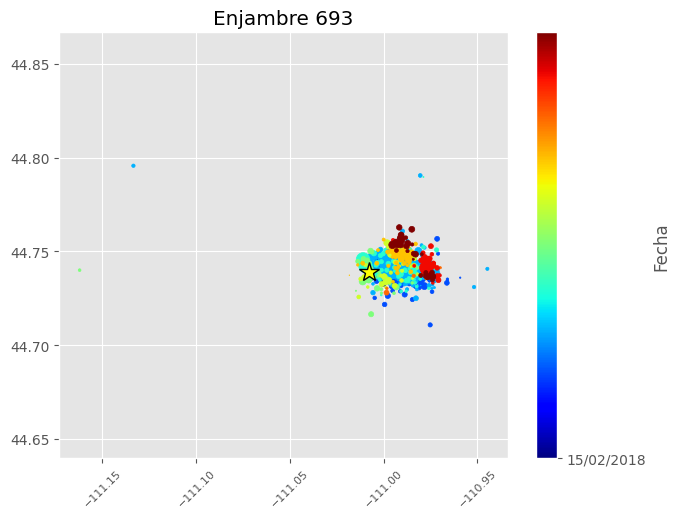

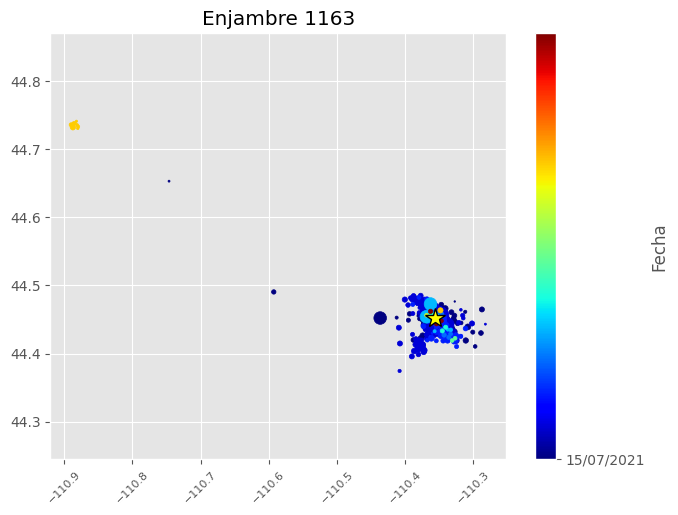

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la escala de color
cmap = plt.cm.get_cmap('jet')

# Estilo
plt.style.use('ggplot')

size = 30

for i in indices:
    enjambre = family[i+1]
    data_enjambre = data.iloc[enjambre]
    time_enjambre = pd.to_datetime(data_enjambre['otime'])
    lat_enjambre = data_enjambre['lat']
    lon_enjambre = data_enjambre['lon']
    mag_enjambre = data_enjambre['mag']
    
    ps= datos_diccionario[i]['primer_sismo']
    lat_ps=ps[2]
    lon_ps=ps[3]
    #plt.plot(lon_ps, lat_ps, marker='*', color='yellow')
    plt.plot(lon_ps, lat_ps, marker='*', color='yellow', markersize=15, markeredgecolor='black')
    # colores segun el tiempo
    ref_date = pd.to_datetime(datos_diccionario[i]['primer_sismo']['otime'])
    days_since_ref = (time_enjambre - ref_date).apply(lambda x: x.days)
    colors = days_since_ref


    #tamaño de los puntos según la magnitud
    sizes = size * mag_enjambre / np.max(mag_enjambre)
    sizes = np.abs(sizes)
    # XRA que size no sea cero
    if sizes.size == 0:
        sizes = np.array([size])
        
    

    plt.scatter(lon_enjambre, lat_enjambre, s=sizes, c=colors, cmap=cmap)
    # Ajustar la gráfica a la densidad de datos
    plt.axis('equal')
    plt.tight_layout()

    #plt.xlim(-111.1, -110.95)
    #plt.ylim(44.74, 44.82)
    plt.xticks(fontsize=8, rotation=45)

    # Convertir los números de días a fechas para mostrar en la barra de color
    ticks = np.arange(0, np.max(days_since_ref)+1, 20)  
    tick_labels = [ref_date + pd.Timedelta(days=d) for d in ticks]  
    cbar = plt.colorbar(ticks=ticks, format="%d/%m/%Y")
    cbar.ax.set_yticklabels([d.strftime('%d/%m/%Y') for d in tick_labels]) 
    cbar.set_label('Fecha')

    
    
    
    plt.title(f'Enjambre {i}')
    
    plt.show()